In [6]:
file=open("data.txt")
data=file.readlines()
file.close()
print(data)

['The quick brown fox jumps over the lazy dog\n', 'Artificial intelligence is transforming the world\n', 'Natural language processing enables computers to understand human language\n', 'Data science involves statistics, programming, and domain expertise\n', 'Machine learning models can identify patterns in large datasets\n', 'Deep learning techniques are inspired by the human brain\n', 'Python is a popular programming language for data analysis\n', 'Big data technologies help manage and analyze massive volumes of data\n', 'Computer vision allows machines to interpret and make decisions based on visual data\n', 'Robotics integrates engineering and computer science to create autonomous machine']


In [7]:
for i in range(len(data)):
  data[i]=data[i].lower().replace('\n','')
  

Example Data

In [8]:
data

['the quick brown fox jumps over the lazy dog',
 'artificial intelligence is transforming the world',
 'natural language processing enables computers to understand human language',
 'data science involves statistics, programming, and domain expertise',
 'machine learning models can identify patterns in large datasets',
 'deep learning techniques are inspired by the human brain',
 'python is a popular programming language for data analysis',
 'big data technologies help manage and analyze massive volumes of data',
 'computer vision allows machines to interpret and make decisions based on visual data',
 'robotics integrates engineering and computer science to create autonomous machine']

Remove stop words and tokenize

In [24]:
stopwords=["the","is","and","to","of","in","over","can","are","a","for","on","by","with"]
tokenlist=[]
for i in data:
  temp=[]
  for j in i.split():    
    if j not in stopwords:
      temp.append(j)
  tokenlist.append(temp)

In [25]:
print(tokenlist)

[['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog'], ['artificial', 'intelligence', 'transforming', 'world'], ['natural', 'language', 'processing', 'enables', 'computers', 'understand', 'human', 'language'], ['data', 'science', 'involves', 'statistics,', 'programming,', 'domain', 'expertise'], ['machine', 'learning', 'models', 'identify', 'patterns', 'large', 'datasets'], ['deep', 'learning', 'techniques', 'inspired', 'human', 'brain'], ['python', 'popular', 'programming', 'language', 'data', 'analysis'], ['big', 'data', 'technologies', 'help', 'manage', 'analyze', 'massive', 'volumes', 'data'], ['computer', 'vision', 'allows', 'machines', 'interpret', 'make', 'decisions', 'based', 'visual', 'data'], ['robotics', 'integrates', 'engineering', 'computer', 'science', 'create', 'autonomous', 'machine']]


Bi-grams

In [30]:
bi_grams=[]
for i in tokenlist:
  for j in range(len(i)):
    for k in range(j+1,len(i)):
      bi_grams.append([i[j],i[k]])
      bi_grams.append([i[k],i[j]])

Vocabulary

In [43]:
vocab=[]
for sent in tokenlist:
  vocab.extend(sent)

vocab=set(vocab)

In [44]:
vocab=list(vocab)
vocab.sort()

One hot Encoding

In [85]:
vocab

['allows',
 'analysis',
 'analyze',
 'artificial',
 'autonomous',
 'based',
 'big',
 'brain',
 'brown',
 'computer',
 'computers',
 'create',
 'data',
 'datasets',
 'decisions',
 'deep',
 'dog',
 'domain',
 'enables',
 'engineering',
 'expertise',
 'fox',
 'help',
 'human',
 'identify',
 'inspired',
 'integrates',
 'intelligence',
 'interpret',
 'involves',
 'jumps',
 'language',
 'large',
 'lazy',
 'learning',
 'machine',
 'machines',
 'make',
 'manage',
 'massive',
 'models',
 'natural',
 'patterns',
 'popular',
 'processing',
 'programming',
 'programming,',
 'python',
 'quick',
 'robotics',
 'science',
 'statistics,',
 'techniques',
 'technologies',
 'transforming',
 'understand',
 'vision',
 'visual',
 'volumes',
 'world']

In [46]:
label=dict()
for i in range(len(vocab)):
  label[vocab[i]]=i

In [59]:
import numpy as np
one_hot_data=np.zeros((len(vocab),len(vocab)))

In [62]:
for i in range(len(vocab)):
  one_hot_data[i][i]=1

In [63]:
one_hot_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [64]:
one_hot={}
for i in range(len(vocab)):
  one_hot[vocab[i]]=one_hot_data[i]

In [72]:
X=[]
Y=[]

for i in bi_grams:
  X.append(one_hot[i[0]])
  Y.append(one_hot[i[1]])

In [74]:
X=np.array(X)
Y=np.array(Y)

In [79]:
X.shape[0]

460

In [92]:
from keras.models import Sequential
from keras.layers import Dense,Input

model=Sequential()

voc_size=len(vocab)

embed_size=2

model.add(Input(shape=(voc_size)))
model.add(Dense(embed_size,activation='linear'))
model.add(Dense(voc_size,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam')

In [94]:
model.fit(X,Y,epochs=1000)

Epoch 1/1000
15/15 [==============================] - 0s 3ms/step - loss: 4.0614
Epoch 2/1000
15/15 [==============================] - 0s 4ms/step - loss: 4.0579
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 4.0544
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 4.0506
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 4.0467
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 4.0427
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 4.0385
Epoch 8/1000
15/15 [==============================] - 0s 2ms/step - loss: 4.0340
Epoch 9/1000
15/15 [==============================] - 0s 3ms/step - loss: 4.0297
Epoch 10/1000
15/15 [==============================] - 0s 2ms/step - loss: 4.0252
Epoch 11/1000
15/15 [==============================] - 0s 3ms/step - loss: 4.0205
Epoch 12/1000
15/15 [==============================] - 0s 3ms/step - loss: 4.0155
Epoch 13/1000
15/15 [====

In [100]:
weights=model.get_weights()[0]
weights

array([[-1.3051451 , -3.536626  ],
       [ 0.79119396, -2.7419112 ],
       [-5.6475034 , -2.1409492 ],
       [ 2.697014  ,  2.5123513 ],
       [-3.4479012 ,  1.6119665 ],
       [-1.2926444 , -3.5043435 ],
       [-5.667706  , -2.147391  ],
       [ 2.4287653 ,  0.7513925 ],
       [ 6.092272  ,  5.943303  ],
       [-0.74289215, -0.36563948],
       [ 4.3550434 , -2.0214386 ],
       [-3.4423409 ,  1.5921    ],
       [-0.6213875 , -1.1856186 ],
       [-0.23676983,  4.116398  ],
       [-1.2508438 , -3.4354243 ],
       [ 2.3888657 ,  0.724715  ],
       [ 6.4343762 ,  5.9240165 ],
       [-0.66860193,  0.04910166],
       [ 4.3460317 , -2.0084229 ],
       [-3.4840398 ,  1.5990844 ],
       [-0.6774956 ,  0.04842937],
       [ 5.9434295 ,  6.353123  ],
       [-5.7588778 , -2.1945314 ],
       [ 2.2155483 , -0.30975014],
       [-0.21124879,  3.9818316 ],
       [ 2.4209218 ,  0.7593608 ],
       [-3.5029624 ,  1.6006186 ],
       [ 2.6828752 ,  2.5184617 ],
       [-1.2976868 ,

In [102]:
word_embeddings={}
for i in range(len(vocab)):
  word_embeddings[vocab[i]]=weights[i]

Results

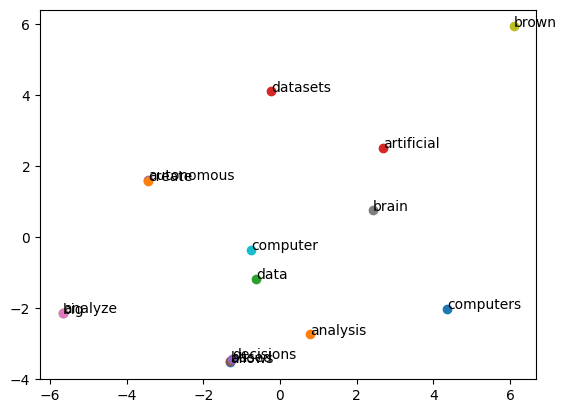

In [106]:
import matplotlib.pyplot as plt

for word in vocab[:15]:
  x=word_embeddings[word]
  plt.scatter(x[0],x[1])
  plt.annotate(word,(x[0],x[1]))

The words in the sample data example will appear closer because we have made in such a way that their context is similar